<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"srishti280992","key":"59582ca54a4086a7dbf043ec8c497309"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-20 10:47:51           6872  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           3149  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3042  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            567  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!kaggle datasets download -d srishti280992/black-lego-parts

black-lego-parts.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! rm -rf datasets

In [ ]:
! mkdir datasets

In [ ]:
! unzip black-lego-parts.zip -d datasets

Archive:  black-lego-parts.zip
  inflating: datasets/black/black/10039.png  
  inflating: datasets/black/black/10052.png  
  inflating: datasets/black/black/10113.png  
  inflating: datasets/black/black/10124.png  
  inflating: datasets/black/black/10126.png  
  inflating: datasets/black/black/10127.png  
  inflating: datasets/black/black/10154.png  
  inflating: datasets/black/black/10169.png  
  inflating: datasets/black/black/10190.png  
  inflating: datasets/black/black/10197.png  
  inflating: datasets/black/black/10201.png  
  inflating: datasets/black/black/10202.png  
  inflating: datasets/black/black/10247.png  
  inflating: datasets/black/black/10258.png  
  inflating: datasets/black/black/10288.png  
  inflating: datasets/black/black/10314.png  
  inflating: datasets/black/black/10904.png  
  inflating: datasets/black/black/10907.png  
  inflating: datasets/black/black/11002.png  
  inflating: datasets/black/black/11055.png  
  inflating: datasets/black/black/11062.png  
  i

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Load Libraries

Here we will load all libraries needed for the analysis

In [ ]:
!pip install ripser==0.5.4

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import cv2
from skimage.filters import prewitt_h,prewitt_v
from skimage.filters import sato
from skimage.filters import sobel
from skimage import feature
from skimage import measure
from skimage.feature import hog
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.measure.entropy import shannon_entropy
from skimage.feature import corner_shi_tomasi, corner_peaks
from skimage import data, segmentation, color, filters, io
from skimage.future import graph
from skimage.filters.edges import prewitt

from skimage import color

from sklearn import svm
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score
import sklearn.metrics as metrics

from tensorflow.python.keras import models, layers, losses, optimizers, utils
from tensorflow.python.keras import backend as K


from ripser import ripser as rpser
from persim import plot_diagrams
from ripser import Rips


from sklearn.model_selection import train_test_split

## Load Data
In this section, we will load the dataset-images and csv!


In [ ]:
def load_data(dir_data,part_df):
    ''' Load each of the image files into memory 

    While this is feasible with a smaller dataset, for larger datasets,
    not all the images would be able to be loaded into memory
    '''
    parts_df  = part_df
    labels    = parts_df.part_cat_group_id.values
    ids       = parts_df.part_num.values
    data      = []
    for identifier in ids:
        fname     = dir_data + identifier + '.png'
        image     = mpl.image.imread(fname)
        data.append(image)
    data = np.array(data) # Convert to Numpy array
    return ids,data, labels

In [ ]:
parts_black=pd.read_csv("datasets/black_final.csv")
parts_black['file_name_poss']= parts_black['part_num']+".png"

parts_black.head()

,part_num,color_id,part_name,part_cat_id,part_material,part_cat_name,color_name,rgb,is_trans,quantity,have_image,part_cat_group,part_cat_group_id,split,file_name_poss
0,2343,0,Equipment Goblet,27,Plastic,Minifig Accessories,Black,05131D,f,63,t,Figures,0,train,2343.png
1,30089a,0,Equipment Camera Handheld with Right-Aligned V...,27,Plastic,Minifig Accessories,Black,05131D,f,42,t,Figures,0,train,30089a.png
2,30162,0,Equipment Binoculars,27,Plastic,Minifig Accessories,Black,05131D,f,42,t,Figures,0,train,30162.png
3,30191,0,Equipment Stretcher Holder,27,Rubber,Minifig Accessories,Black,05131D,f,5,t,Figures,0,val,30191.png
4,30340,0,Equipment Flotation Ring [Life Preserver],27,Plastic,Minifig Accessories,Black,05131D,f,22,t,Figures,0,train,30340.png


In [ ]:
parts_black.loc[parts_black['split'] == "val", 'split'] = "test"
parts_black['split'].value_counts()

train    1910
test      478
Name: split, dtype: int64

In [ ]:
train_parts = parts_black[parts_black['split']=="train"]
train_parts.shape

(1910, 15)

In [ ]:
trainset, testset = train_test_split(train_parts, test_size=0.3, random_state=0, 
                                     stratify=train_parts.part_cat_group_id)

train_parts['split_tv'] = np.where(train_parts.part_num.isin(trainset.part_num), "train", "val")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
parts_black=pd.merge(parts_black, train_parts[["part_num","split_tv"]], how='left', on=["part_num"])
parts_black['split_tv'] = parts_black['split_tv'].fillna("test")
parts_black['split_tv'].value_counts()

train    1337
val       573
test      478
Name: split_tv, dtype: int64

In [ ]:
parts_black=parts_black.drop(columns=['split'])

In [ ]:
del train_parts

In [ ]:
# separate df with train
train=parts_black[parts_black['split_tv']!='test']

In [ ]:
################### All images ######################
#selecting parts with both entries in csv and part drawings
figures_parts_files_path= "datasets/black/black"
possibilities=train['file_name_poss'].tolist()
diagrams=os.listdir(figures_parts_files_path)
complete_parts=list(set(possibilities) & set(diagrams))
print(len(complete_parts))

# selecting by group figures
parts_select_fig=train[train['file_name_poss'].isin(complete_parts)]

# Load data
figures_dir="datasets/black/black/"
train_part_ids,figures,labels = load_data(figures_dir,parts_select_fig)

1910


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
labels

array([0, 0, 0, ..., 5, 5, 5])

We have loaded 1910 part images for training

## Image Transformation

The following steps are executed:
* Grayscale Transformation

In [ ]:
# using Luminance to obtain grayscale images
# luminance is the weighted average of RGB values
data_gray_fig = [color.rgb2gray(i) for i in figures]

In [ ]:
del figures

Text(0.5, 1.0, 'Image after applying grayscale filter')

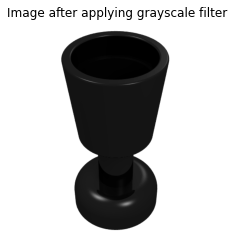

In [ ]:
# plot image after applying vertical edge filter to grayscale image
plt.imshow(data_gray_fig[0], cmap='gray')
plt.axis('off')
plt.title('Image after applying grayscale filter')

## Feature Engineering

### Edge Detection

#### Prewitt

In [ ]:
hor_edges = []
ver_edges = []
for image in data_gray_fig[0:10]:
    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(image)
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(image)
    hor_edges.append(edges_prewitt_horizontal)
    ver_edges.append(edges_prewitt_vertical)

Text(0.5, 1.0, 'Image after applying vertical edge detector')

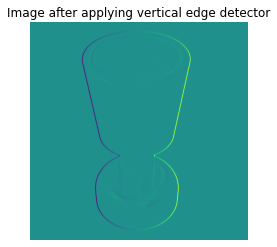

In [ ]:
# plot image after applying vertical edge filter to grayscale image
plt.imshow(ver_edges[0])
plt.axis('off')
plt.title('Image after applying vertical edge detector')

Text(0.5, 1.0, 'Image after applying horizontal edge detector')

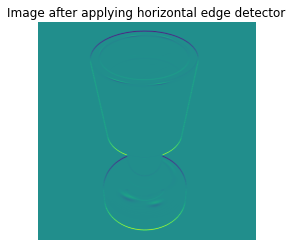

In [ ]:
# plot image after applying horizontal edge filter to grayscale image
plt.imshow(hor_edges[0])
plt.axis('off')
plt.title('Image after applying horizontal edge detector')

In [ ]:
del hor_edges
del ver_edges

#### Canny

In [ ]:
canny_edges_for_image = []
for image in data_gray_fig[0:10]:
    # running this bit to get the images after canny edge detector is applied- to visualize
    edges_sigma1 = feature.canny(image, sigma=3)
    canny_edges_for_image.append(edges_sigma1)
    
len(canny_edges_for_image)

10

Text(0.5, 1.0, 'Image after applying Canny Edge Detector')

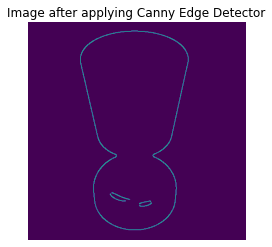

In [ ]:
# plot image after applying canny edge detector to grayscale image
plt.imshow(canny_edges_for_image[0])
plt.axis('off')
plt.title('Image after applying Canny Edge Detector')

In [ ]:
del canny_edges_for_image

In [ ]:
canny_edges = []
for image in data_gray_fig:
    # obtain canny detector applied images
    edges_sigma1 = feature.canny(image, sigma=3)
    # averaging the canny edge applied image by its size to obtain a feature
    apw = (float(np.sum(edges_sigma1)) / (image.size))
    canny_edges.append(apw)
    
len(canny_edges)

1910

### Entropy filter and Shannon Entropy

Computing entropies is an expensive task-consumes a lot of RAm, so we will demonstrate the application of an entropy filter on 10 images. We will use the Shannon entropy which is the measure of information content of the image as the feature.

In [ ]:
#compute entropies- apply entropies filter
entropies = []
for image in data_gray_fig[0:10]:
    #getting images with entropy filter applied to the images
    e1 =entropy(image, disk(10))
    entropies.append(e1)
    
len(entropies)

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


10

Text(0.5, 1.0, 'Image after applying entropy filter')

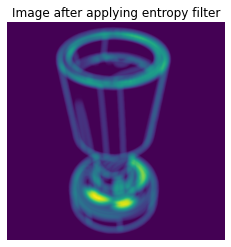

In [ ]:
# plot image after applying entropy filter to grayscale image
plt.imshow(entropies[0])
plt.axis('off')
plt.title('Image after applying entropy filter')

In [ ]:
del entropies
#because it consumes memory

In [ ]:
shannon_entr = []
for image in data_gray_fig:
    #calculating shannon entropy (proprtional to -log(pk) where pk= probability of a pixel with intensity k)
    shannon_e1 = shannon_entropy(image)
    shannon_entr.append(shannon_e1)
    
len(shannon_entr)

1910

In [ ]:
#corner detection algos
shitomasi_corners_for_image = []

for image in data_gray_fig[0:10]:
    coords=corner_shi_tomasi(image)
    coords_peaks = corner_peaks(corner_shi_tomasi(image), min_distance=1)
    #coords_subpix = corner_subpix(image, coords_peaks, window_size=7)
    shitomasi_corners_for_image.append(coords)   


Text(0.5, 1.0, 'Image after applying Harris Corner Detector')

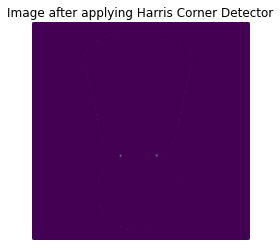

In [ ]:
# plot image after applying corner detection algos
plt.imshow(shitomasi_corners_for_image[0])
plt.axis('off')
plt.title('Image after applying Harris Corner Detector')

In [ ]:
del shitomasi_corners_for_image

In [ ]:
#corner detection algos
corners_count = []

for image in data_gray_fig:
    coords=corner_shi_tomasi(image)
    coords_peaks = corner_peaks(corner_shi_tomasi(image), min_distance=1)
    #coords_subpix = corner_subpix(image, coords_peaks, window_size=7)
    corners_count.append(len(coords_peaks))
    #print("Number of corners detected:",len(coords_peaks))
    #print(coords_peaks)

len(corners_count)

1910

### Tubeness extraction

In [ ]:
sato_res = []
for image in data_gray_fig[0:10]:
    #getting images with SATO tubeness filter applied to the images
    st1 =sato(image)
    sato_res.append(st1)
    
len(sato_res)

10

Text(0.5, 1.0, 'Image after applying Sato Tube filter')

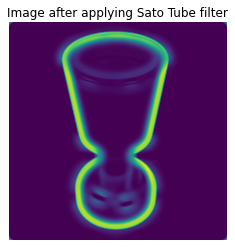

In [ ]:
# plot image after applying sato tube filter
plt.imshow(sato_res[0])
plt.axis('off')
plt.title('Image after applying Sato Tube filter')

In [ ]:
del sato_res

In [ ]:
sato_res_avg = []
for image in data_gray_fig:
    #getting images with SATO tubeness filter applied to the images
    st1 =sato(image)
    # averaging the tubeness by its size to obtain a feature
    at = (float(np.sum(st1)) / (image.size))
    sato_res_avg.append(at)
    
len(sato_res_avg)

1910

### Means and Standard Deviations

In [ ]:
means_image = []
for image in data_gray_fig:
    #image means
    avg1 = image.mean()
    means_image.append(avg1)
    
len(means_image)

1910

In [ ]:
stdevs_image = []
for image in data_gray_fig:
    #image st deviations
    std1 = image.std()
    stdevs_image.append(std1)
    
len(stdevs_image)

1910

### HOG transformation

In [ ]:
# apply HOG (Histogram of Oriented Gradient) transformation
ppc = 8
#hog_images = []
hog_features = []
for image in data_gray_fig:
    # extracting hog transformed feature arrays
    fd = hog(image, orientations=10, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2-Hys',visualize=False)
    #fd,hog_image = hog(image, orientations=10, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2-Hys',visualize=True)
    #print(fd)
    #hog_images.append(hog_image)
    hog_features.append(fd)

In [ ]:
# to view this uncomment the hog images line in the above snippet, change to (visualize=True) and then use the hog_images array to view a sample output
# Please run this for a few images only by indexing: data_gray_fig[0:5] in the above snippet as it is a resource and time intensive process
# plot image after applying HOG filter to grayscale image
# plt.imshow(hog_images[0])
# plt.axis('off')
# plt.title('Image after applying HOG filter')

In [ ]:
hog_features_length_transformed=[]
count=1
for i in range(len(np.array(hog_features))):
  max_length=148840
  if len(hog_features[i]) != max_length:
    append_width= int((max_length-len(hog_features[i]))/2)
    print(hog_features[i])
    print("transforming image at position:",i)
    print("No. of images transformed:",count)
    count=count+1
    transformed_hf_i= np.pad(hog_features[i], (append_width, append_width), 'constant', constant_values=(0, 0))
    print("Converted from length:",len(hog_features[i]),"to length:",len(transformed_hf_i))
    print(transformed_hf_i)
    hog_features_length_transformed.append(transformed_hf_i)
  else:
    #print("original Length:",len(hog_features[i]))
    #print("No need of padding")
    hog_features_length_transformed.append(hog_features[i])

[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 175
No. of images transformed: 1
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 176
No. of images transformed: 2
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 686
No. of images transformed: 3
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 701
No. of images transformed: 4
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 1483
No. of images transformed: 5
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 1490
No. of images transformed: 6
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
del hog_features

#### PCA to reduce dimensionality

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
n_components=10
m,n=np.array(hog_features_length_transformed).shape

ipca = IncrementalPCA(copy=False,
    n_components=n_components,
    batch_size=10)

In [ ]:
#ipca.fit(np.array(hog_features_length_transformed))
#PCA_hog_components = ipca.components_
#print(PCA_hog_components) # 10 components ## shape= (10,148840)

# takes a lot of memory--let us try with partial_fit

In [ ]:
hog_data=np.array(hog_features_length_transformed)
num_rows = hog_data.shape[0]     # total number of rows in data
chunk_size = 191             # how many rows at a time to feed ipca (divisor of num_rows)

for i in range(0, num_rows//chunk_size):
  print(i)
  ipca.partial_fit(hog_data[i*chunk_size : (i+1)*chunk_size])

0
1
2
3
4
5
6
7
8
9


In [ ]:
# hog_pca = pca.fit_transform(np.array(hog_features_length_transformed)) #do this if it fits your memory
# doing this as it is less memory intensive
out = [] # shape N x 2
for i in range(0, num_rows//chunk_size):
  print(i)
  out[i*chunk_size:(i+1) * chunk_size] = ipca.transform(hog_data[i*chunk_size : (i+1)*chunk_size])

0
1
2
3
4
5
6
7
8
9


Text(0.5, 1.0, 'Explained Variance ratio by 10 principal components from HOG descriptors')

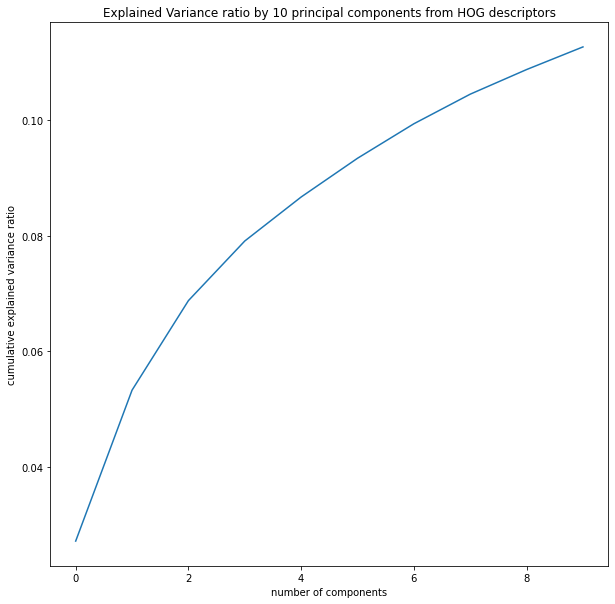

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.plot(np.cumsum(ipca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance ratio')
plt.title("Explained Variance ratio by 10 principal components from HOG descriptors")

In [ ]:
del hog_features_length_transformed

In [ ]:
np.array(out)

array([[-10.42912086,  -8.12855225, -11.24710132, ...,   1.37574807,
          0.40726626,  -0.60185678],
       [  3.12410328,  -4.37031118,  -2.7787185 , ...,  -1.89114175,
          1.99175655,   0.36574973],
       [ -8.71571487,  -3.49761328,   7.0458604 , ...,   3.00325295,
          4.80283204,  -3.75090459],
       ...,
       [  0.24194752, -17.58809701,  -6.54003408, ...,   2.93597003,
          2.72279282,   2.14519183],
       [ -1.01463225, -12.4377407 ,  -3.91710952, ...,   4.44519313,
          2.38080132,   1.42344014],
       [ -8.21235098, -14.29156182,  -9.77305056, ...,  -0.64229186,
          2.75367312,   0.62403504]])

### Feature Space

Here we stack features and prepare the dataset for the classification algorithms.

In [ ]:
#changing data type and structure to meet dimension requirements for the model
shannon_entr=np.array(shannon_entr).reshape(len(shannon_entr),1)
canny_edges=np.array(canny_edges).reshape(len(canny_edges),1)
sato_res_avg=np.array(sato_res_avg).reshape(len(sato_res_avg),1)
corners_count=np.array(corners_count).reshape(len(corners_count),1)
means_image=np.array(means_image).reshape(len(means_image),1)
stdevs_image=np.array(stdevs_image).reshape(len(stdevs_image),1)
hog_pcs=np.array(out)

In [ ]:
# reshaping labels to meet dimension requirements
labels=labels.reshape(len(labels),1)
labels

array([[0],
       [0],
       [0],
       ...,
       [5],
       [5],
       [5]])

In [ ]:
# reshaping part_ids to meet dimension requirements
train_part_ids=train_part_ids.reshape(len(train_part_ids),1)
train_part_ids

array([['2343'],
       ['30089a'],
       ['30162'],
       ...,
       ['32206'],
       ['32218'],
       ['32230']], dtype=object)

In [ ]:
# stacking feature sets

features= np.hstack((shannon_entr,canny_edges,sato_res_avg,corners_count,means_image,stdevs_image,hog_pcs))
features.shape

(1910, 16)

In [ ]:
# creating a data structure with both features and lables
data_frame = np.hstack((features,labels,train_part_ids))
data_frame

array([[2.892348216782081, 0.006444, 0.02011559771846629, ...,
        -0.6018567798296284, 0, '2343'],
       [4.2142486057007655, 0.007512, 0.023451516363921527, ...,
        0.3657497266406885, 0, '30089a'],
       [3.6315198083955993, 0.0073, 0.022321677826889243, ...,
        -3.750904589184502, 0, '30162'],
       ...,
       [1.7732348491426664, 0.0073, 0.019773979188455224, ...,
        2.1451918286469036, 5, '32206'],
       [2.75286035053871, 0.009408, 0.026938831752844037, ...,
        1.4234401418114049, 5, '32218'],
       [1.527288199992429, 0.006768, 0.017612865299353513, ...,
        0.6240350364774246, 5, '32230']], dtype=object)

In [ ]:
Xs=data_frame[:,:-2]
Ys=data_frame[:,-2:-1].ravel().astype(int)
IDs=data_frame[:,-1:].ravel()
Ys

## Classification

### Baseline SVM

In [ ]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(Ys, classes=[0, 1, 2,3,4,5])
n_classes = Y.shape[1]

from sklearn.preprocessing import StandardScaler
# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                    OneVsRestClassifier(svm.LinearSVC(random_state=0, tol=1e-6,max_iter=8000,class_weight="balanced",dual=False)))

clf.fit(Xs,Ys)
y_score = clf.decision_function(Xs)

In [ ]:
y_preds=clf.predict(Xs)
y_preds

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'black', 'darkorange', 'red', 'teal','green'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.58), prop=dict(size=14))


plt.show()

In [ ]:
accuracy_score(Ys, y_preds)

### LGBM

In [ ]:
#shuffling data
np.random.seed(1000)  
np.random.shuffle(data_frame)

In [ ]:
# create a dataframe
df= pd.DataFrame(data_frame)
df=df.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"Cat",17:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df.Cat = df.Cat.astype(int)
df

,SE,CE,Sato,Corners,Means,SD,HOG_PC1,HOG_PC2,HOG_PC3,HOG_PC4,HOG_PC5,HOG_PC6,HOG_PC7,HOG_PC8,HOG_PC9,HOG_PC10,Cat,Part_num
0,3.73083,0.007608,0.0212412,42,0.616249,0.434553,-11.3124,-7.55193,0.400497,0.89131,3.26025,-1.75736,5.61226,-0.617447,0.617013,3.08984,5,87574
1,3.69056,0.006456,0.0212878,10,0.60655,0.441289,-12.4212,-8.00456,0.781029,-4.98909,4.12235,-1.70232,5.98245,1.07421,1.22733,2.00931,1,2341
2,4.30674,0.006408,0.0229142,14,0.534291,0.452698,1.71341,-0.976002,-9.23265,-3.04385,-1.62646,-2.43195,6.56708,-2.7994,3.05266,-0.512204,5,57519
3,2.42216,0.007208,0.020335,42,0.780075,0.384513,-11.0067,-11.6329,-1.59876,-1.01529,3.14774,-2.20887,4.17535,1.83186,0.223578,1.60435,0,50858
4,3.31559,0.017108,0.0325029,25,0.688927,0.383468,-1.54133,-9.25881,-2.57287,1.23733,4.74647,0.758134,5.68451,4.56966,7.31306,-0.0792502,2,3070bp60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,3.37691,0.008824,0.0245071,10,0.651019,0.427713,-7.2323,-8.6152,-8.76188,3.52829,-1.45019,-0.451143,6.55533,2.32609,0.072211,-1.27333,0,3896
1906,2.7964,0.009268,0.0291141,43,0.687572,0.423839,-6.03082,-9.23383,-9.46177,0.762313,0.0334389,1.04003,5.38718,-1.36026,0.34707,1.58839,0,64272
1907,1.84829,0.005588,0.0176242,29,0.830921,0.35048,-11.4563,-13.3027,-8.74444,2.6733,0.0179385,1.73077,6.17408,-3.97995,1.0689,2.10401,0,19220
1908,3.9043,0.00798,0.023526,16,0.611491,0.433773,-13.3737,-10.6899,0.705179,2.56917,4.79464,2.58175,-0.793997,-0.410707,0.163518,2.16932,1,4085c


In [ ]:
rearranged_IDs_train=df["Part_num"]
target_var="Cat"
y = df[target_var]
df.drop([target_var,"Part_num"],axis=1, inplace=True)
df.shape

(1910, 16)

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
features_space = df.columns
lgtrain = lgb.Dataset(df.loc[:,features_space],y, categorical_feature= "auto")

In [ ]:
print("Setting Paramters for Light Gradient Boosting Classifier...")
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 7,
    'metric': ['multi_error'],
    "learning_rate": 0.1,
     "num_leaves": 60,
     "max_depth": 9,
     "feature_fraction": 0.45,
     "bagging_fraction": 0.3,
     "reg_alpha": 0.15,
     "reg_lambda": 0.15,
      "min_child_weight": 0
                }

Setting Paramters for Light Gradient Boosting Classifier...


In [ ]:
import time
modelstart= time.time()

results = pd.DataFrame(columns = ["Rounds","Score","STDV", "LB", "Parameters"])
# Find Optimal Parameters / Boosting Rounds
lgb_cv = lgb.cv(
    params = lgbm_params,
    train_set = lgtrain,
    num_boost_round=2000,
    stratified=True,
    nfold = 10,
    verbose_eval=50,
    seed = 123,
    early_stopping_rounds=75)

loss = lgbm_params["metric"][0]
optimal_rounds = np.argmin(lgb_cv[str(loss) + '-mean'])
best_cv_score = min(lgb_cv[str(loss) + '-mean'])

print("\nOptimal Round: {}\nOptimal Score: {} + {}".format(
    optimal_rounds,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds]))

results = results.append({"Rounds": optimal_rounds,
                          "Score": best_cv_score,
                          "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds],
                          "LB": None,
                          "Parameters": lgbm_params}, ignore_index=True)
results.to_csv("lgb_10fold.csv", header=False)

[50]	cv_agg's multi_error: 0.384817 + 0.0169248
[100]	cv_agg's multi_error: 0.368586 + 0.0189063
[150]	cv_agg's multi_error: 0.367539 + 0.0192795

Optimal Round: 117
Optimal Score: 0.3617801047120419 + 0.01850324298122754


In [ ]:
display(results.sort_values(by="Score",ascending = True))

,Rounds,Score,STDV,LB,Parameters
0,117,0.36178,0.018503,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."


In [ ]:
tune_parameter = [0.05,0.08,0.2,0.5]
tune = 'learning_rate'
for param in tune_parameter:
    print("{} Parameter: {}".format(tune, param))
    modelstart= time.time()
    lgbm_params[tune] = param
    # Find Optimal Parameters / Boosting Rounds
    lgb_cv = lgb.cv(
        params = lgbm_params,
        train_set = lgtrain,
        num_boost_round=10000,
        stratified=True,
        nfold = 10,
        verbose_eval=50,
        seed = 123,
        early_stopping_rounds=75)

    optimal_rounds = np.argmin(lgb_cv[str(loss) + '-mean'])
    best_cv_score = min(lgb_cv[str(loss) + '-mean'])

    print("Optimal Round: {}\nOptimal Score: {} + {}".format(
        optimal_rounds,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds]))
    print("###########################################################################################")

    results = results.append({"Rounds": optimal_rounds,
                              "Score": best_cv_score,
                              "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds],
                              "LB": None,
                              "Parameters": lgbm_params}, ignore_index=True)

learning_rate Parameter: 0.05
[50]	cv_agg's multi_error: 0.398429 + 0.0242708
[100]	cv_agg's multi_error: 0.37801 + 0.0101522
[150]	cv_agg's multi_error: 0.367016 + 0.0129204
[200]	cv_agg's multi_error: 0.360733 + 0.0186508
[250]	cv_agg's multi_error: 0.363874 + 0.0199022
Optimal Round: 201
Optimal Score: 0.35968586387434553 + 0.018738775045207625
###########################################################################################
learning_rate Parameter: 0.08
[50]	cv_agg's multi_error: 0.389005 + 0.022342
[100]	cv_agg's multi_error: 0.367016 + 0.0228754
[150]	cv_agg's multi_error: 0.360733 + 0.0228754
[200]	cv_agg's multi_error: 0.355497 + 0.022995
[250]	cv_agg's multi_error: 0.35288 + 0.0230842
[300]	cv_agg's multi_error: 0.35288 + 0.0230842
[350]	cv_agg's multi_error: 0.349738 + 0.0197015
[400]	cv_agg's multi_error: 0.349215 + 0.0190291
[450]	cv_agg's multi_error: 0.351309 + 0.0185032
Optimal Round: 383
Optimal Score: 0.3471204188481675 + 0.01917260044356079
#################

In [ ]:
display(results.sort_values(by="Score",ascending = True))

,Rounds,Score,STDV,LB,Parameters
2,383,0.347120,0.019173,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."
1,201,0.359686,0.018739,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."
3,143,0.360209,0.021814,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."
4,84,0.360209,0.025841,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."
0,117,0.361780,0.018503,None,"{'task': 'train', 'boosting_type': 'gbdt', 'ob..."


In [ ]:
results.to_csv("lgb_tune.csv", header=False)

In [ ]:
# Best Parameters
final_model_params = results.iloc[results["Score"].idxmin(),:]["Parameters"]
optimal_rounds = results.iloc[results["Score"].idxmin(),:]["Rounds"]
print("Parameters for Final Models:\n",final_model_params)
print("Score: {} +/- {}".format(results.iloc[results["Score"].idxmin(),:]["Score"],results.iloc[results["Score"].idxmin(),:]["STDV"]))
print("Rounds: ", optimal_rounds)

Parameters for Final Models:
 {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 7, 'metric': ['multi_error'], 'learning_rate': 0.5, 'num_leaves': 60, 'max_depth': 9, 'feature_fraction': 0.45, 'bagging_fraction': 0.3, 'reg_alpha': 0.15, 'reg_lambda': 0.15, 'min_child_weight': 0}
Score: 0.3471204188481675 +/- 0.01917260044356079
Rounds:  383


In [ ]:
pred_index = df.index

Seed:  500
Model Runtime: 0.03 Minutes
###########################################################################################
All Model Runtime: 0.03 Minutes


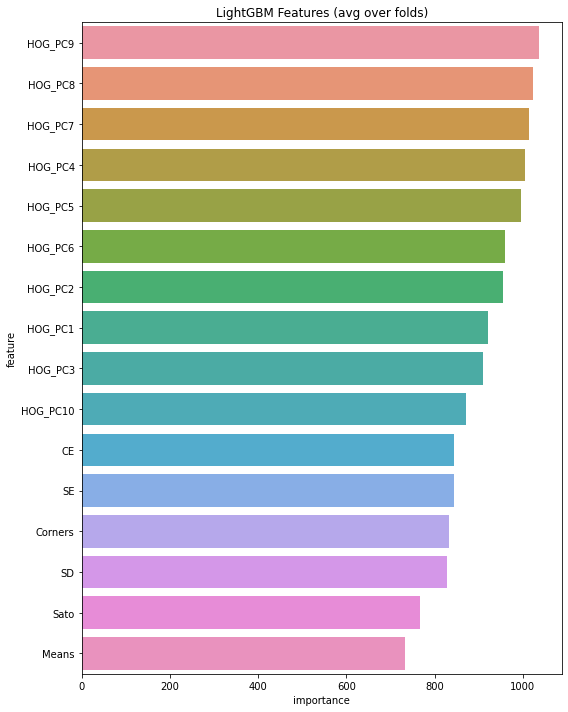

In [ ]:
allmodelstart= time.time()
# Run Model with different Seeds
all_feature_importance_df  = pd.DataFrame()

# To get predictions
def seed_pred(model,seed):
    # Output position with highest probability
    class_prediction = (pd.DataFrame(model.predict(df)).idxmax(axis=1)).rename(target_var)
    class_prediction.index = pred_index
    class_prediction.to_csv('mean_preds.csv',index = True, header=True)
    return class_prediction

all_seeds = [500]
for seeds_x in all_seeds:
    modelstart= time.time()
    print("Seed: ", seeds_x,)
    # Go Go Go
    final_model_params["seed"] = seeds_x
    lgb_final = lgb.train(
        final_model_params,
        lgtrain,
        num_boost_round = optimal_rounds + 1,
        verbose_eval=200)

    # Feature Importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features_space
    fold_importance_df["importance"] = lgb_final.feature_importance()
    all_feature_importance_df = pd.concat([all_feature_importance_df, fold_importance_df], axis=0)
    

    preds_all=pd.DataFrame(lgb_final.predict(df))
    train_predict_class=seed_pred(model= lgb_final, seed= seeds_x)
    print("Model Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))
    print("###########################################################################################")
    #del lgb_final

cols = all_feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index
best_features = all_feature_importance_df.loc[all_feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(8,10))
sns.barplot(x="importance", y="feature", 
            data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgb_finalm_importances.png')
print("All Model Runtime: %0.2f Minutes"%((time.time() - allmodelstart)/60))

In [ ]:
preds_all

In [ ]:
# separate df with test
test=parts_black[parts_black['split_tv']=='test']


################### All test images ######################
#selecting parts with both entries in csv and part drawings
figures_parts_files_path= "datasets/black/black"
possibilities=test['file_name_poss'].tolist()
diagrams=os.listdir(figures_parts_files_path)
complete_parts=list(set(possibilities) & set(diagrams))
print(len(complete_parts))

# selecting by group figures
parts_select_fig=test[test['file_name_poss'].isin(complete_parts)]

# Load data
figures_dir="datasets/black/black/"
test_part_ids,figures_test,labels_test = load_data(figures_dir,parts_select_fig)

478


In [ ]:
from skimage import color
# using Luminance to obtain grayscale images
# luminance is the weighted average of RGB values
data_gray_fig_test = [color.rgb2gray(i) for i in figures_test]

In [ ]:
del figures_test

In [ ]:
canny_edges_test = []
for image in data_gray_fig_test:
    # obtain canny detector applied images
    edges_sigma1 = feature.canny(image, sigma=3)
    # averaging the canny edge applied image by its size to obtain a feature
    apw = (float(np.sum(edges_sigma1)) / (image.size))
    canny_edges_test.append(apw)
    
len(canny_edges_test)

478

In [ ]:
shannon_entr_test = []
for image in data_gray_fig_test:
    #calculating shannon entropy (proprtional to -log(pk) where pk= probability of a pixel with intensity k)
    shannon_e1 = shannon_entropy(image)
    shannon_entr_test.append(shannon_e1)
    
len(shannon_entr_test)

478

In [ ]:
#corner detection algos
corners_count_test = []

for image in data_gray_fig_test:
    coords=corner_shi_tomasi(image)
    coords_peaks = corner_peaks(corner_shi_tomasi(image), min_distance=1)
    #coords_subpix = corner_subpix(image, coords_peaks, window_size=7)
    corners_count_test.append(len(coords_peaks))
    #print("Number of corners detected:",len(coords_peaks))
    #print(coords_peaks)

len(corners_count_test)

478

In [ ]:
sato_res_avg_test = []
for image in data_gray_fig_test:
    #getting images with SATO tubeness filter applied to the images
    st1 =sato(image)
    # averaging the tubeness by its size to obtain a feature
    at = (float(np.sum(st1)) / (image.size))
    sato_res_avg_test.append(at)
    
len(sato_res_avg_test)

478

In [ ]:
means_image_test = []
for image in data_gray_fig_test:
    #image means
    avg1 = image.mean()
    means_image_test.append(avg1)
    
print(len(means_image_test))

stdevs_image_test = []
for image in data_gray_fig_test:
    #image st deviations
    std1 = image.std()
    stdevs_image_test.append(std1)
    
print(len(stdevs_image_test))

478
478


In [ ]:
# apply HOG (Histogram of Oriented Gradient) transformation
ppc = 8
#hog_images = []
hog_features_test = []
for image in data_gray_fig_test:
    # extracting hog transformed feature arrays
    fd = hog(image, orientations=10, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2-Hys',visualize=False)
    #fd,hog_image = hog(image, orientations=10, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2-Hys',visualize=True)
    #print(fd)
    #hog_images.append(hog_image)
    hog_features_test.append(fd)

In [ ]:
hog_features_length_transformed_test=[]
count=1
for i in range(len(np.array(hog_features_test))):
  max_length=148840
  if len(hog_features_test[i]) != max_length:
    append_width= int((max_length-len(hog_features_test[i]))/2)
    print(hog_features_test[i])
    print("transforming image at position:",i)
    print("No. of images transformed:",count)
    count=count+1
    transformed_hf_i= np.pad(hog_features_test[i], (append_width, append_width), 'constant', constant_values=(0, 0))
    print("Converted from length:",len(hog_features_test[i]),"to length:",len(transformed_hf_i))
    print(transformed_hf_i)
    hog_features_length_transformed_test.append(transformed_hf_i)
  else:
    #print("original Length:",len(hog_features_test[i]))
    #print("No need of padding")
    hog_features_length_transformed_test.append(hog_features_test[i])

[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 188
No. of images transformed: 1
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 198
No. of images transformed: 2
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
transforming image at position: 408
No. of images transformed: 3
Converted from length: 36000 to length: 148840
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
del hog_features_test

In [ ]:
n_batches = 100
n_components=10
m,n=np.array(hog_features_length_transformed_test).shape


hog_data_test=np.array(hog_features_length_transformed_test)
num_rows_test = hog_data_test.shape[0]     # total number of rows in data
chunk_size_test = 239             # how many rows at a time to feed ipca (divisor of num_rows)

for i in range(0, num_rows_test//chunk_size_test):
  print(i)
  ipca.partial_fit(hog_data_test[i*chunk_size_test : (i+1)*chunk_size_test])

out_test = [] # shape N x 2
for i in range(0, num_rows_test//chunk_size_test):
  print(i)
  out_test[i*chunk_size_test:(i+1) * chunk_size_test] = ipca.transform(hog_data_test[i*chunk_size_test : (i+1)*chunk_size_test])

0
1
0
1


In [ ]:
del hog_features_length_transformed_test

In [ ]:
#changing data type and structure to meet dimension requirements for the model
shannon_entr_test=np.array(shannon_entr_test).reshape(len(shannon_entr_test),1)
canny_edges_test=np.array(canny_edges_test).reshape(len(canny_edges_test),1)
sato_res_avg_test=np.array(sato_res_avg_test).reshape(len(sato_res_avg_test),1)
corners_count_test=np.array(corners_count_test).reshape(len(corners_count_test),1)
means_image_test=np.array(means_image_test).reshape(len(means_image_test),1)
stdevs_image_test=np.array(stdevs_image_test).reshape(len(stdevs_image_test),1)
hog_pcs_test=np.array(out_test)

In [ ]:
labels_test=labels_test.reshape(len(labels_test),1)
test_part_ids=test_part_ids.reshape(len(test_part_ids),1)

In [ ]:
# stacking feature sets
features_test= np.hstack((shannon_entr_test,canny_edges_test,sato_res_avg_test,corners_count_test,means_image_test,stdevs_image_test,hog_pcs_test))
features_test.shape

(478, 16)

In [ ]:
# creating a data structure with both features and lables
data_frame_test = np.hstack((features_test,labels_test,test_part_ids))
data_frame_test

array([[0.8994984367318009, 0.009648, 0.020675437699866107, ...,
        -1.1142698020968307, 0, '30191'],
       [1.8482259676714596, 0.007184, 0.016928135574959677, ...,
        0.5515957587960026, 0, '3900'],
       [1.348564516264548, 0.00516, 0.01728246190472609, ...,
        1.6705631496993862, 0, '3837'],
       ...,
       [2.4403621262232646, 0.005992, 0.017664155612584522, ...,
        -0.3568952809452513, 5, '18945'],
       [2.4135237865590007, 0.008448, 0.022569918019289287, ...,
        -1.0633847239006688, 5, '32205'],
       [3.8594236976585425, 0.008828, 0.028249939534533954, ...,
        1.8083291042614664, 5, '32246']], dtype=object)

In [ ]:
# create a dataframe
df_test= pd.DataFrame(data_frame_test)
df_test=df_test.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"Cat",17:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df_test.Cat = df_test.Cat.astype(int)
df_test

,SE,CE,Sato,Corners,Means,SD,HOG_PC1,HOG_PC2,HOG_PC3,HOG_PC4,HOG_PC5,HOG_PC6,HOG_PC7,HOG_PC8,HOG_PC9,HOG_PC10,Cat,Part_num
0,0.899498,0.009648,0.0206754,69,0.944241,0.209018,-11.1894,-21.0698,-5.5438,-5.28462,2.48591,-5.28422,4.63661,-0.400004,1.509,-1.11427,0,30191
1,1.84823,0.007184,0.0169281,6,0.85406,0.322451,-19.0419,-9.74445,-0.453676,-3.7903,7.71843,-2.22041,4.68862,1.48826,2.4114,0.551596,0,3900
2,1.34856,0.00516,0.0172825,9,0.856342,0.326693,-16.6664,-13.0015,-10.2343,3.18851,4.03319,-0.382773,2.79883,0.253924,1.08757,1.67056,0,3837
3,3.7967,0.01058,0.0226579,7,0.612513,0.436105,-16.0395,-2.07349,3.55864,-3.87211,1.5118,-0.731539,5.47106,-0.21609,2.0832,0.280434,0,4349
4,2.38261,0.005848,0.0181078,10,0.668696,0.425321,-15.8018,-9.60877,-8.80586,1.57679,1.16344,-1.11621,4.06966,1.96866,-1.06114,-1.12583,0,33009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2.37053,0.007208,0.0209901,14,0.76763,0.394896,-19.1367,-8.62874,-0.814691,-3.91127,0.445602,-0.412652,4.66453,-0.593663,0.745579,1.30622,5,64681
474,3.01304,0.010488,0.0282549,33,0.708666,0.417882,-18.8445,-3.42796,3.91861,-6.24804,1.32756,0.521016,5.60324,1.01262,1.73381,-0.326838,5,32189
475,2.44036,0.005992,0.0176642,14,0.798907,0.365832,-4.18798,-19.4569,-2.09988,-0.48792,0.746327,-0.864352,5.62729,1.62471,2.53624,-0.356895,5,18945
476,2.41352,0.008448,0.0225699,25,0.776861,0.384807,-5.53718,-12.1422,-4.02406,1.44608,2.75849,-2.49977,7.93635,2.15355,3.18432,-1.06338,5,32205


In [ ]:
rearranged_IDs_test=df_test["Part_num"]
target_var="Cat"
y_test = df_test[target_var]
df_test.drop([target_var,"Part_num"],axis=1, inplace=True)
df_test = df_test.apply(pd.to_numeric)
df_test.shape

(478, 16)

In [ ]:
df_test.head(3)

,SE,CE,Sato,Corners,Means,SD,HOG_PC1,HOG_PC2,HOG_PC3,HOG_PC4,HOG_PC5,HOG_PC6,HOG_PC7,HOG_PC8,HOG_PC9,HOG_PC10
0,0.899498,0.009648,0.020675,69.0,0.944241,0.209018,-11.189383,-21.069794,-5.543804,-5.284616,2.485908,-5.284221,4.636607,-0.400004,1.509004,-1.114270
1,1.848226,0.007184,0.016928,6.0,0.854060,0.322451,-19.041907,-9.744452,-0.453676,-3.790300,7.718426,-2.220413,4.688625,1.488261,2.411397,0.551596
2,1.348565,0.005160,0.017282,9.0,0.856342,0.326693,-16.666373,-13.001505,-10.234295,3.188511,4.033188,-0.382773,2.798829,0.253924,1.087573,1.670563


In [ ]:
preds_all_test=pd.DataFrame(lgb_final.predict(df_test))

In [ ]:
preds_all_test

,0,1,2,3,4,5,6
0,0.037131,0.002470,0.006976,0.581844,0.174960,0.196618,1.170437e-15
1,0.233742,0.282512,0.015596,0.066187,0.006408,0.395554,2.430436e-15
2,0.361123,0.436906,0.086731,0.021515,0.035455,0.058271,4.177900e-15
3,0.081134,0.032265,0.002181,0.005949,0.102927,0.775544,1.036893e-15
4,0.080846,0.885034,0.004121,0.004145,0.007600,0.018255,1.183153e-15
...,...,...,...,...,...,...,...
473,0.900487,0.002304,0.000169,0.003656,0.013304,0.080081,1.799252e-16
474,0.206745,0.029497,0.000612,0.001356,0.693536,0.068255,1.175886e-15
475,0.092565,0.527239,0.024256,0.164153,0.115705,0.076082,1.964134e-15
476,0.167399,0.008006,0.050908,0.023675,0.648215,0.101797,2.186190e-15


In [ ]:
test_predict_class=(pd.DataFrame(lgb_final.predict(df_test)).idxmax(axis=1))
metrics.accuracy_score(np.array(y_test), np.array(test_predict_class))

0.5418410041841004

In [ ]:
# test results df
test_results=pd.DataFrame(test_part_ids)
test_results['predicted_class']=test_predict_class
test_results['actuals']=y_test

test_results=test_results.rename(columns={0: "Part_num", "predicted_class": "predicted_class", "actuals": "actuals"}, errors="raise")
test_results

,Part_num,predicted_class,actuals
0,30191,3,0
1,3900,5,0
2,3837,1,0
3,4349,5,0
4,33009,1,0
...,...,...,...
473,64681,0,5
474,32189,4,5
475,18945,1,5
476,32205,4,5


In [ ]:
test_results[test_results["predicted_class"]==test_results["actuals"]].tail(30)

,Part_num,predicted_class,actuals
423,44810,0,0
424,93575,0,0
425,87798,0,0
426,40339,0,0
428,92233,0,0
429,15355,0,0
432,62386,0,0
434,53542,0,0
435,92234,0,0
436,41663,0,0


In [ ]:
test_results[test_results["Part_num"]=="3437pe1"]
test_results[test_results["Part_num"]=="32802"]

,Part_num,predicted_class,actuals
104,32802,5,1


Text(0.5, 1.0, 'Image after applying grayscale filter')

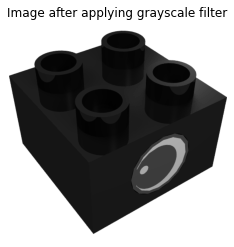

In [ ]:
# plot image after applying vertical edge filter to grayscale image
plt.imshow(data_gray_fig_test[470], cmap='gray')
plt.axis('off')
plt.title('Image after applying grayscale filter')

Text(0.5, 1.0, 'Image after applying grayscale filter')

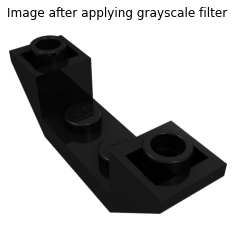

In [ ]:
# plot image after applying vertical edge filter to grayscale image
plt.imshow(data_gray_fig_test[104], cmap='gray')
plt.axis('off')
plt.title('Image after applying grayscale filter')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[67.21  9.84  0.82  3.28  7.38 11.48]
 [15.13 70.59  1.68  1.68  0.   10.92]
 [13.95 25.58 51.16  2.33  2.33  4.65]
 [42.31 11.54 19.23 11.54 11.54  3.85]
 [20.55 13.7   9.59  2.74 39.73 13.7 ]
 [21.05 22.11  4.21  2.11  9.47 41.05]]


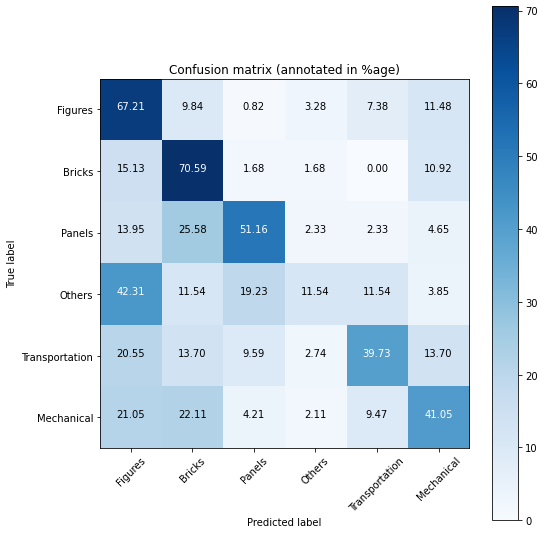

In [ ]:
cf_matrix=metrics.confusion_matrix(test_results['actuals'], test_results['predicted_class'],labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig=plt.figure(figsize=(8,8))

plot_confusion_matrix(cf_matrix, classes=['Figures', 'Bricks', 'Panels','Others','Transportation','Mechanical'],
                      title='Confusion matrix (annotated in %age)',normalize=True)

In [ ]:
metrics.accuracy_score(np.array(y), np.array(train_predict_class)) #definitely overfitting

1.0

## Topological Feature Engineering

In [ ]:
!pip install -U giotto-tda

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 6.8MB 5.5MB/s 
     |████████████████████████████████| 25.9MB 40.3MB/s 
     |████████████████████████████████| 14.5MB 14.0MB/s 
     |████████████████████████████████| 399kB 15.8MB/s 
     |████████████████████████████████| 3.2MB 12.9MB/s 
     |████████████████████████████████| 13.1MB 15.2MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: scipy 1.4

In [ ]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
import gtda.diagrams as diagrams

import warnings
warnings.filterwarnings("ignore")

In [ ]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])
PE = PersistenceEntropy()
# define wass amplitude to calculate
amplitude_w = diagrams.Amplitude(metric="wasserstein")
# define wass amplitude to calculate
amplitude_l = diagrams.Amplitude(metric="landscape")
# define wass amplitude to calculate
amplitude_b = diagrams.Amplitude(metric="betti")
#number of points
points_nbr = diagrams.NumberOfPoints()

PEs = []
landscape_amplitudes=[]
betti_amplitudes=[]
wass_amplitudes=[]
no_of_points=[]
for image in data_gray_fig:
  X=image
  diagrams_i = VR.fit_transform(X[None, :, :])
  features_i = PE.fit_transform(diagrams_i)
  ampl_l_i = amplitude_l.fit_transform(diagrams_i)
  ampl_w_i = amplitude_w.fit_transform(diagrams_i)
  ampl_b_i = amplitude_b.fit_transform(diagrams_i)
  point_i = points_nbr.fit_transform(diagrams_i)
  PEs.append(features_i)
  landscape_amplitudes.append(ampl_l_i)
  wass_amplitudes.append(ampl_w_i)
  betti_amplitudes.append(ampl_b_i)
  no_of_points.append(point_i)


In [ ]:
# reshape to include in feature space for classification
PE_features= np.array(PEs).reshape(np.array(PEs).shape[0],np.array(PEs).shape[2])

In [ ]:
# stacking feature sets

features_tda= np.hstack((shannon_entr,canny_edges,sato_res_avg,corners_count,means_image,stdevs_image,hog_pcs,PE_features))
features_tda.shape

In [ ]:
features_tda

In [ ]:
# creating a data structure with both features and lables
data_frame_tda = np.hstack((features_tda,labels,train_part_ids))
data_frame_tda

In [ ]:
#shuffling data
np.random.seed(1000)  
np.random.shuffle(data_frame_tda)
data_frame_tda

In [ ]:
# create a dataframe
df_tda= pd.DataFrame(data_frame_tda)
df_tda=df_tda.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"PE_1",17:"PE_2",
                    18:"Cat",19:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df_tda.Cat = df_tda.Cat.astype(int)
df_tda

In [ ]:
rearranged_IDs_train_tda=df_tda["Part_num"]
target_var="Cat"
y_tda = df_tda[target_var]
df_tda.drop([target_var,"Part_num"],axis=1, inplace=True)
df_tda = df_tda.apply(pd.to_numeric)
print(df_tda.shape)
features_space_tda = df_tda.columns
lgtrain_tda = lgb.Dataset(df_tda.loc[:,features_space_tda],y_tda, categorical_feature= "auto")
print("created LGB dataset...")

In [ ]:
modelstart_tda= time.time()

results_tda = pd.DataFrame(columns = ["Rounds","Score","STDV", "LB", "Parameters"])
# Find Optimal Parameters / Boosting Rounds
lgb_cv = lgb.cv(
    params = lgbm_params,
    train_set = lgtrain_tda,
    num_boost_round=2000,
    stratified=True,
    nfold = 10,
    verbose_eval=50,
    seed = 123,
    early_stopping_rounds=75)

loss = lgbm_params["metric"][0]
optimal_rounds_tda = np.argmin(lgb_cv[str(loss) + '-mean'])
best_cv_score = min(lgb_cv[str(loss) + '-mean'])

print("\nOptimal Round: {}\nOptimal Score: {} + {}".format(
    optimal_rounds_tda,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds_tda]))

results_tda = results_tda.append({"Rounds": optimal_rounds_tda,
                          "Score": best_cv_score,
                          "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds_tda],
                          "LB": None,
                          "Parameters": lgbm_params}, ignore_index=True)
results_tda.to_csv("lgb_10fold_tda.csv", header=False)

In [ ]:
tune_parameter = [0.05,0.08,0.2,0.5]
tune = 'learning_rate'
for param in tune_parameter:
    print("{} Parameter: {}".format(tune, param))
    modelstart_tda= time.time()
    lgbm_params[tune] = param
    # Find Optimal Parameters / Boosting Rounds
    lgb_cv = lgb.cv(
        params = lgbm_params,
        train_set = lgtrain_tda,
        num_boost_round=10000,
        stratified=True,
        nfold = 10,
        verbose_eval=50,
        seed = 123,
        early_stopping_rounds=75)

    optimal_rounds = np.argmin(lgb_cv[str(loss) + '-mean'])
    best_cv_score = min(lgb_cv[str(loss) + '-mean'])

    print("Optimal Round: {}\nOptimal Score: {} + {}".format(
        optimal_rounds,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds]))
    print("###########################################################################################")

    results_tda = results_tda.append({"Rounds": optimal_rounds,
                              "Score": best_cv_score,
                              "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds],
                              "LB": None,
                              "Parameters": lgbm_params}, ignore_index=True)

In [ ]:
# Best Parameters with TDA
final_model_params_tda = results_tda.iloc[results_tda["Score"].idxmin(),:]["Parameters"]
optimal_rounds_tda = results_tda.iloc[results_tda["Score"].idxmin(),:]["Rounds"]
print("Parameters for Final Models:\n",final_model_params_tda)
print("Score: {} +/- {}".format(results_tda.iloc[results_tda["Score"].idxmin(),:]["Score"],results_tda.iloc[results_tda["Score"].idxmin(),:]["STDV"]))
print("Rounds: ", optimal_rounds_tda)

In [ ]:
allmodelstart= time.time()
# Run Model with different Seeds
all_feature_importance_df_tda  = pd.DataFrame()

# To get predictions
def seed_pred(model,seed):
    # Output position with highest probability
    class_prediction = (pd.DataFrame(model.predict(df_tda)).idxmax(axis=1)).rename(target_var)
    class_prediction.index = pred_index
    class_prediction.to_csv('mean_preds_tda.csv',index = True, header=True)
    return class_prediction

all_seeds = [500]
for seeds_x in all_seeds:
    modelstart= time.time()
    print("Seed: ", seeds_x,)
    # Go Go Go
    final_model_params_tda["seed"] = seeds_x
    lgb_final_tda = lgb.train(
        final_model_params_tda,
        lgtrain_tda,
        num_boost_round = optimal_rounds_tda + 1,
        verbose_eval=200)

    # Feature Importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features_space_tda
    fold_importance_df["importance"] = lgb_final_tda.feature_importance()
    all_feature_importance_df_tda = pd.concat([all_feature_importance_df_tda, fold_importance_df], axis=0)
    

    preds_all_tda=pd.DataFrame(lgb_final_tda.predict(df))
    train_predict_class_tda=seed_pred(model= lgb_final_tda, seed= seeds_x)
    print("Model Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))
    print("###########################################################################################")
    #del lgb_final_tda

cols = all_feature_importance_df_tda[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index
best_features = all_feature_importance_df_tda.loc[all_feature_importance_df_tda.feature.isin(cols)]
plt.figure(figsize=(8,10))
sns.barplot(x="importance", y="feature", 
            data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgb_finalm_importances_tda.png')
print("All Model Runtime: %0.2f Minutes"%((time.time() - allmodelstart)/60))

In [ ]:
all_feature_importance_df_tda

In [ ]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])
PE = PersistenceEntropy()
PEs_test = []
for image in data_gray_fig_test:
  X=image
  diagrams = VR.fit_transform(X[None, :, :])
  features_i = PE.fit_transform(diagrams)
  PEs_test.append(features_i)


len(PEs_test)

In [ ]:
# reshape to include in feature space for classification
PE_features_test= np.array(PEs_test).reshape(np.array(PEs_test).shape[0],np.array(PEs_test).shape[2])

In [ ]:
# stacking feature sets
features_test_tda= np.hstack((shannon_entr_test,canny_edges_test,sato_res_avg_test,corners_count_test,means_image_test,stdevs_image_test,hog_pcs_test,PE_features_test))
features_test_tda.shape
# creating a data structure with both features and lables
data_frame_test_tda = np.hstack((features_test_tda,labels_test,test_part_ids))
data_frame_test_tda

In [ ]:
# create a dataframe
df_test_tda= pd.DataFrame(data_frame_test_tda)
df_test_tda=df_test_tda.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"PE_1",17:"PE_2",
                    18:"Cat",19:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df_test_tda.Cat = df_test_tda.Cat.astype(int)
df_test_tda

In [ ]:
rearranged_IDs_test_tda=df_test_tda["Part_num"]
target_var="Cat"
y_test_tda = df_test_tda[target_var]
df_test_tda.drop([target_var,"Part_num"],axis=1, inplace=True)
df_test_tda = df_test_tda.apply(pd.to_numeric)
df_test_tda.shape

In [ ]:
preds_all_test_tda=pd.DataFrame(lgb_final_tda.predict(df_test_tda))
test_predict_class_tda=(pd.DataFrame(lgb_final_tda.predict(df_test_tda)).idxmax(axis=1))
metrics.accuracy_score(np.array(y_test_tda), np.array(test_predict_class_tda))

In [ ]:
# test results df
test_results_tda=pd.DataFrame(test_part_ids)
test_results_tda['predicted_class']=test_predict_class_tda
test_results_tda['actuals']=y_test_tda

test_results_tda=test_results_tda.rename(columns={0: "Part_num", "predicted_class": "predicted_class", "actuals": "actuals"}, errors="raise")
test_results_tda

In [ ]:
cf_matrix_tda=metrics.confusion_matrix(test_results_tda['actuals'], test_results_tda['predicted_class'],labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig=plt.figure(figsize=(8,8))

plot_confusion_matrix(cf_matrix_tda, classes=['Figures', 'Bricks', 'Panels','Others','Transportation','Mechanical'],
                      title='Confusion matrix (annotated in %age)',normalize=True)

In [ ]:
m1_right=test_results[test_results["predicted_class"]==test_results["actuals"]]
m2_right=test_results_tda[test_results_tda["predicted_class"]==test_results_tda["actuals"]]

pd.merge(m1_right, m2_right, how ='inner', on =['Part_num']) 

In [ ]:
print(m1_right.shape)
print(m2_right.shape)

In [ ]:
m1_wrong=test_results[(test_results["predicted_class"]!=test_results["actuals"]) & (test_results["actuals"]==1)]
m2_right2=test_results_tda[(test_results_tda["predicted_class"]==test_results_tda["actuals"])&(test_results_tda["actuals"]==1)]

pd.merge(m1_wrong, m2_right2, how ='inner', on =['Part_num']) 

In [ ]:
print(m1_wrong.shape)
print(m2_right2.shape)

In [ ]:
# reshape to include in feature space for classification
PE_features= np.array(PEs).reshape(np.array(PEs).shape[0],np.array(PEs).shape[2])
wass_amplitudes_ftrs= np.array(wass_amplitudes).reshape(np.array(wass_amplitudes).shape[0],np.array(wass_amplitudes).shape[2])
betti_amplitudes_ftrs= np.array(betti_amplitudes).reshape(np.array(betti_amplitudes).shape[0],np.array(betti_amplitudes).shape[2])
landscape_amplitudes_ftrs= np.array(landscape_amplitudes).reshape(np.array(landscape_amplitudes).shape[0],np.array(landscape_amplitudes).shape[2])
no_of_points_ftrs= np.array(no_of_points).reshape(np.array(no_of_points).shape[0],np.array(no_of_points).shape[2])

In [ ]:
# stacking feature sets

features_tda_2= np.hstack((shannon_entr,canny_edges,sato_res_avg,corners_count,means_image,stdevs_image,hog_pcs,PE_features,wass_amplitudes_ftrs,betti_amplitudes_ftrs,landscape_amplitudes_ftrs,no_of_points_ftrs))
features_tda_2.shape

(1910, 26)

In [ ]:
# creating a data structure with both features and lables
data_frame_tda2 = np.hstack((features_tda_2,labels,train_part_ids))
data_frame_tda2

array([[2.892348216782081, 0.006444, 0.02011559771846629, ..., 80.0, 0,
        '2343'],
       [4.2142486057007655, 0.007512, 0.023451516363921527, ..., 12.0, 0,
        '30089a'],
       [3.6315198083955993, 0.0073, 0.022321677826889243, ..., 24.0, 0,
        '30162'],
       ...,
       [1.7732348491426664, 0.0073, 0.019773979188455224, ..., 9.0, 5,
        '32206'],
       [2.75286035053871, 0.009408, 0.026938831752844037, ..., 7.0, 5,
        '32218'],
       [1.527288199992429, 0.006768, 0.017612865299353513, ..., 70.0, 5,
        '32230']], dtype=object)

In [ ]:
#shuffling data
np.random.seed(1000)  
np.random.shuffle(data_frame_tda2)
data_frame_tda2

array([[3.7308338229756575, 0.007608, 0.021241155945973467, ..., 2.0, 5,
        '87574'],
       [3.6905601461084836, 0.006456, 0.02128780137842248, ..., 36.0, 1,
        '2341'],
       [4.3067412630171225, 0.006408, 0.022914201772816948, ..., 9.0, 5,
        '57519'],
       ...,
       [1.8482884732022082, 0.005588, 0.017624169717095864, ..., 51.0, 0,
        '19220'],
       [3.904298246100278, 0.00798, 0.023526045438414307, ..., 1.0, 1,
        '4085c'],
       [4.049628177961457, 0.00808, 0.02374202429844276, ..., 15.0, 5,
        '2582']], dtype=object)

In [ ]:
# create a dataframe
#,wass_amplitudes_ftrs,betti_amplitudes_ftrs,landscape_amplitudes_ftrs,no_of_points_ftrs
df_tda2= pd.DataFrame(data_frame_tda2)
df_tda2=df_tda2.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"PE_1",17:"PE_2",
                    18:"Wass_comp1",19:"Wass_comp2",
                    20:"Betti_comp1",21:"Betti_comp2",
                    22:"Landscape_comp1",23:"Landscape_comp2",
                    24:"no_pnts_1",25:"no_pnts_2",
                    26:"Cat",27:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df_tda2.Cat = df_tda2.Cat.astype(int)
df_tda2.head()

,SE,CE,Sato,Corners,Means,SD,HOG_PC1,HOG_PC2,HOG_PC3,HOG_PC4,HOG_PC5,HOG_PC6,HOG_PC7,HOG_PC8,HOG_PC9,HOG_PC10,PE_1,PE_2,Wass_comp1,Wass_comp2,Betti_comp1,Betti_comp2,Landscape_comp1,Landscape_comp2,no_pnts_1,no_pnts_2,Cat,Part_num
0,3.73083,0.007608,0.0212412,42,0.616249,0.434553,-11.3124,-7.55193,0.400497,0.89131,3.26025,-1.75736,5.61226,-0.617447,0.617013,3.08984,8.66334,0.00500033,10.5162,5.10725,381.97,3.19601,1.29799,9.42351,430,2,5,87574
1,3.69056,0.006456,0.0212878,10,0.60655,0.441289,-12.4212,-8.00456,0.781029,-4.98909,4.12235,-1.70232,5.98245,1.07421,1.22733,2.00931,8.54987,0.694082,10.6687,3.09695,370.299,2.80655,4.34978,4.44849,397,36,1,2341
2,4.30674,0.006408,0.0229142,14,0.534291,0.452698,1.71341,-0.976002,-9.23265,-3.04385,-1.62646,-2.43195,6.56708,-2.7994,3.05266,-0.512204,8.56489,0.127091,10.1966,4.42755,346.368,2.99736,1.71831,7.60611,425,9,5,57519
3,2.42216,0.007208,0.020335,42,0.780075,0.384513,-11.0067,-11.6329,-1.59876,-1.01529,3.14774,-2.20887,4.17535,1.83186,0.223578,1.60435,8.40219,0,9.47703,4.15926,302.575,2.88419,1.19666,6.92559,395,1,0,50858
4,3.31559,0.017108,0.0325029,25,0.688927,0.383468,-1.54133,-9.25881,-2.57287,1.23733,4.74647,0.758134,5.68451,4.56966,7.31306,-0.0792502,8.55466,1.95472,15.0843,4.03238,434.669,5.7156,2.12943,6.23478,397,15,2,3070bp60


In [ ]:
rearranged_IDs_train_tda2=df_tda2["Part_num"]
target_var="Cat"
y_tda2 = df_tda2[target_var]
df_tda2.drop([target_var,"Part_num"],axis=1, inplace=True)
df_tda2 = df_tda2.apply(pd.to_numeric)
print(df_tda2.shape)
features_space_tda2 = df_tda2.columns
lgtrain_tda2 = lgb.Dataset(df_tda2.loc[:,features_space_tda2],y_tda2, categorical_feature= "auto")
print("created LGB dataset...")

(1910, 26)
created LGB dataset...


In [ ]:
modelstart_tda= time.time()

results_tda2 = pd.DataFrame(columns = ["Rounds","Score","STDV", "LB", "Parameters"])
# Find Optimal Parameters / Boosting Rounds
lgb_cv = lgb.cv(
    params = lgbm_params,
    train_set = lgtrain_tda2,
    num_boost_round=2000,
    stratified=True,
    nfold = 10,
    verbose_eval=50,
    seed = 123,
    early_stopping_rounds=75)

loss = lgbm_params["metric"][0]
optimal_rounds_tda2 = np.argmin(lgb_cv[str(loss) + '-mean'])
best_cv_score = min(lgb_cv[str(loss) + '-mean'])

print("\nOptimal Round: {}\nOptimal Score: {} + {}".format(
    optimal_rounds_tda2,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds_tda2]))

results_tda2 = results_tda2.append({"Rounds": optimal_rounds_tda2,
                          "Score": best_cv_score,
                          "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds_tda2],
                          "LB": None,
                          "Parameters": lgbm_params}, ignore_index=True)
results_tda2.to_csv("lgb_10fold_tda.csv", header=False)

[50]	cv_agg's multi_error: 0.350262 + 0.0309255
[100]	cv_agg's multi_error: 0.344503 + 0.0373016
[150]	cv_agg's multi_error: 0.345026 + 0.0370546

Optimal Round: 80
Optimal Score: 0.343979057591623 + 0.036802223603748636


In [ ]:
tune_parameter = [0.05,0.08,0.2,0.5]
tune = 'learning_rate'
for param in tune_parameter:
    print("{} Parameter: {}".format(tune, param))
    modelstart_tda2= time.time()
    lgbm_params[tune] = param
    # Find Optimal Parameters / Boosting Rounds
    lgb_cv = lgb.cv(
        params = lgbm_params,
        train_set = lgtrain_tda2,
        num_boost_round=10000,
        stratified=True,
        nfold = 10,
        verbose_eval=50,
        seed = 123,
        early_stopping_rounds=75)

    optimal_rounds = np.argmin(lgb_cv[str(loss) + '-mean'])
    best_cv_score = min(lgb_cv[str(loss) + '-mean'])

    print("Optimal Round: {}\nOptimal Score: {} + {}".format(
        optimal_rounds,best_cv_score,lgb_cv[str(loss) + '-stdv'][optimal_rounds]))
    print("###########################################################################################")

    results_tda2 = results_tda2.append({"Rounds": optimal_rounds,
                              "Score": best_cv_score,
                              "STDV": lgb_cv[str(loss) + '-stdv'][optimal_rounds],
                              "LB": None,
                              "Parameters": lgbm_params}, ignore_index=True)

learning_rate Parameter: 0.05
[50]	cv_agg's multi_error: 0.378534 + 0.0362015
[100]	cv_agg's multi_error: 0.354974 + 0.0245348
[150]	cv_agg's multi_error: 0.344503 + 0.0255205
[200]	cv_agg's multi_error: 0.336126 + 0.0264696
[250]	cv_agg's multi_error: 0.336649 + 0.030533
[300]	cv_agg's multi_error: 0.339791 + 0.0296587
Optimal Round: 257
Optimal Score: 0.33455497382198957 + 0.0317132308291263
###########################################################################################
learning_rate Parameter: 0.08
[50]	cv_agg's multi_error: 0.369634 + 0.028311
[100]	cv_agg's multi_error: 0.349738 + 0.0287529
[150]	cv_agg's multi_error: 0.336126 + 0.0301491
[200]	cv_agg's multi_error: 0.333508 + 0.0344159
[250]	cv_agg's multi_error: 0.33089 + 0.0339951
[300]	cv_agg's multi_error: 0.328272 + 0.0327005
[350]	cv_agg's multi_error: 0.326702 + 0.0325451
[400]	cv_agg's multi_error: 0.329843 + 0.0319329
Optimal Round: 338
Optimal Score: 0.3246073298429319 + 0.031238605005604807
################

In [ ]:
# Best Parameters with TDA
final_model_params_tda2 = results_tda2.iloc[results_tda2["Score"].idxmin(),:]["Parameters"]
optimal_rounds_tda2 = results_tda2.iloc[results_tda2["Score"].idxmin(),:]["Rounds"]
print("Parameters for Final Models:\n",final_model_params_tda2)
print("Score: {} +/- {}".format(results_tda2.iloc[results_tda2["Score"].idxmin(),:]["Score"],results_tda2.iloc[results_tda2["Score"].idxmin(),:]["STDV"]))
print("Rounds: ", optimal_rounds_tda2)

Parameters for Final Models:
 {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 7, 'metric': ['multi_error'], 'learning_rate': 0.5, 'num_leaves': 60, 'max_depth': 9, 'feature_fraction': 0.45, 'bagging_fraction': 0.3, 'reg_alpha': 0.15, 'reg_lambda': 0.15, 'min_child_weight': 0, 'seed': 500}
Score: 0.3246073298429319 +/- 0.031238605005604807
Rounds:  338


Seed:  500
Model Runtime: 0.03 Minutes
###########################################################################################
All Model Runtime: 0.04 Minutes


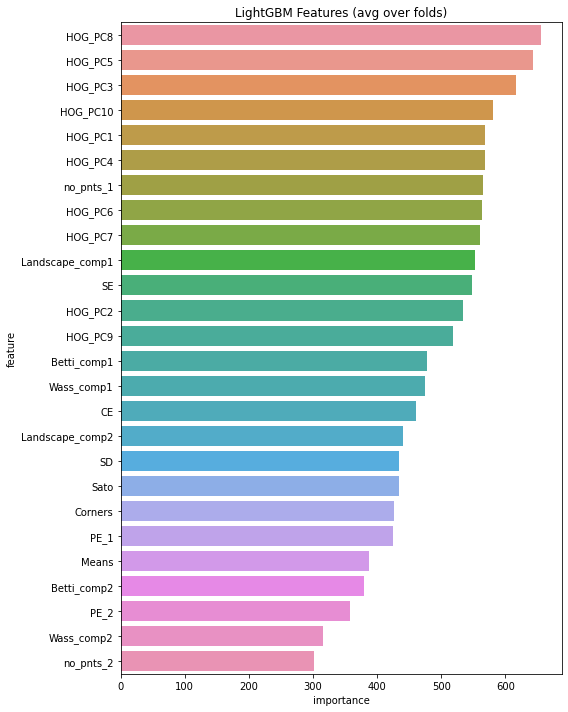

In [ ]:
allmodelstart= time.time()
# Run Model with different Seeds
all_feature_importance_df_tda2  = pd.DataFrame()

# To get predictions
def seed_pred(model,seed):
    # Output position with highest probability
    class_prediction = (pd.DataFrame(model.predict(df_tda2)).idxmax(axis=1)).rename(target_var)
    class_prediction.index = pred_index
    class_prediction.to_csv('mean_preds_tda2.csv',index = True, header=True)
    return class_prediction

all_seeds = [500]
for seeds_x in all_seeds:
    modelstart= time.time()
    print("Seed: ", seeds_x,)
    # Go Go Go
    final_model_params_tda2["seed"] = seeds_x
    lgb_final_tda2 = lgb.train(
        final_model_params_tda2,
        lgtrain_tda2,
        num_boost_round = optimal_rounds_tda2 + 1,
        verbose_eval=200)

    # Feature Importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features_space_tda2
    fold_importance_df["importance"] = lgb_final_tda2.feature_importance()
    all_feature_importance_df_tda2 = pd.concat([all_feature_importance_df_tda2, fold_importance_df], axis=0)
    

    preds_all_tda2=pd.DataFrame(lgb_final_tda2.predict(df))
    train_predict_class_tda=seed_pred(model= lgb_final_tda2, seed= seeds_x)
    print("Model Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))
    print("###########################################################################################")
    #del lgb_final_tda2

cols = all_feature_importance_df_tda2[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index
best_features = all_feature_importance_df_tda2.loc[all_feature_importance_df_tda2.feature.isin(cols)]
plt.figure(figsize=(8,10))
sns.barplot(x="importance", y="feature", 
            data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgb_finalm_importances_tda.png')
print("All Model Runtime: %0.2f Minutes"%((time.time() - allmodelstart)/60))

In [ ]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])
PE = PersistenceEntropy()
# define wass amplitude to calculate
amplitude_w = diagrams.Amplitude(metric="wasserstein")
# define wass amplitude to calculate
amplitude_l = diagrams.Amplitude(metric="landscape")
# define wass amplitude to calculate
amplitude_b = diagrams.Amplitude(metric="betti")
#number of points
points_nbr = diagrams.NumberOfPoints()

PEs_test = []
landscape_amplitudes_test=[]
betti_amplitudes_test=[]
wass_amplitudes_test=[]
no_of_points_test=[]
for image in data_gray_fig_test:
  X=image
  diagrams_i = VR.fit_transform(X[None, :, :])
  features_i = PE.fit_transform(diagrams_i)
  ampl_l_i = amplitude_l.fit_transform(diagrams_i)
  ampl_w_i = amplitude_w.fit_transform(diagrams_i)
  ampl_b_i = amplitude_b.fit_transform(diagrams_i)
  point_i = points_nbr.fit_transform(diagrams_i)
  PEs_test.append(features_i)
  landscape_amplitudes_test.append(ampl_l_i)
  wass_amplitudes_test.append(ampl_w_i)
  betti_amplitudes_test.append(ampl_b_i)
  no_of_points_test.append(point_i)

In [ ]:
# reshape to include in feature space for classification
PE_features_test= np.array(PEs_test).reshape(np.array(PEs_test).shape[0],np.array(PEs_test).shape[2])
wass_amplitudes_ftrs_test= np.array(wass_amplitudes_test).reshape(np.array(wass_amplitudes_test).shape[0],np.array(wass_amplitudes_test).shape[2])
betti_amplitudes_ftrs_test= np.array(betti_amplitudes_test).reshape(np.array(betti_amplitudes_test).shape[0],np.array(betti_amplitudes_test).shape[2])
landscape_amplitudes_ftrs_test= np.array(landscape_amplitudes_test).reshape(np.array(landscape_amplitudes_test).shape[0],np.array(landscape_amplitudes_test).shape[2])
no_of_points_ftrs_test= np.array(no_of_points_test).reshape(np.array(no_of_points_test).shape[0],np.array(no_of_points_test).shape[2])

In [ ]:
# stacking feature sets
features_test_tda2= np.hstack((shannon_entr_test,canny_edges_test,sato_res_avg_test,corners_count_test,
                              means_image_test,stdevs_image_test,hog_pcs_test,PE_features_test,
                              wass_amplitudes_ftrs_test,betti_amplitudes_ftrs_test,landscape_amplitudes_ftrs_test,
                              no_of_points_ftrs_test))
features_test_tda2.shape
# creating a data structure with both features and lables
data_frame_test_tda2 = np.hstack((features_test_tda2,labels_test,test_part_ids))
data_frame_test_tda2

array([[0.8994984367318009, 0.009648, 0.020675437699866107, ..., 19.0, 0,
        '30191'],
       [1.8482259676714596, 0.007184, 0.016928135574959677, ..., 10.0, 0,
        '3900'],
       [1.348564516264548, 0.00516, 0.01728246190472609, ..., 29.0, 0,
        '3837'],
       ...,
       [2.4403621262232646, 0.005992, 0.017664155612584522, ..., 1.0, 5,
        '18945'],
       [2.4135237865590007, 0.008448, 0.022569918019289287, ..., 2.0, 5,
        '32205'],
       [3.8594236976585425, 0.008828, 0.028249939534533954, ..., 1.0, 5,
        '32246']], dtype=object)

In [ ]:
# create a dataframe
df_test_tda2= pd.DataFrame(data_frame_test_tda2)
df_test_tda2=df_test_tda2.rename(columns={0: "SE", 1: "CE", 2: "Sato",3:"Corners",4:"Means",5:"SD",
                    6:"HOG_PC1",7:"HOG_PC2",8:"HOG_PC3",9:"HOG_PC4",10:"HOG_PC5",11:"HOG_PC6",12:"HOG_PC7",13:"HOG_PC8",14:"HOG_PC9",15:"HOG_PC10",
                    16:"PE_1",17:"PE_2",
                    18:"Wass_comp1",19:"Wass_comp2",
                    20:"Betti_comp1",21:"Betti_comp2",
                    22:"Landscape_comp1",23:"Landscape_comp2",
                    24:"no_pnts_1",25:"no_pnts_2",
                    26:"Cat",27:"Part_num"}, errors="raise")
# #To modify the float to int do this:
df_test_tda2.Cat = df_test_tda2.Cat.astype(int)
df_test_tda2

,SE,CE,Sato,Corners,Means,SD,HOG_PC1,HOG_PC2,HOG_PC3,HOG_PC4,HOG_PC5,HOG_PC6,HOG_PC7,HOG_PC8,HOG_PC9,HOG_PC10,PE_1,PE_2,Wass_comp1,Wass_comp2,Betti_comp1,Betti_comp2,Landscape_comp1,Landscape_comp2,no_pnts_1,no_pnts_2,Cat,Part_num
0,0.899498,0.009648,0.0206754,69,0.944241,0.209018,-11.1894,-21.0698,-5.5438,-5.28462,2.48591,-5.28422,4.63661,-0.400004,1.509,-1.11427,7.89951,2.31611,15.5048,3.32007,315.188,6.57639,1.63922,3.69113,257,19,0,30191
1,1.84823,0.007184,0.0169281,6,0.85406,0.322451,-19.0419,-9.74445,-0.453676,-3.7903,7.71843,-2.22041,4.68862,1.48826,2.4114,0.551596,8.14282,1.06765,9.53161,2.61069,276.125,2.68456,2.30692,3.34368,319,10,0,3900
2,1.34856,0.00516,0.0172825,9,0.856342,0.326693,-16.6664,-13.0015,-10.2343,3.18851,4.03319,-0.382773,2.79883,0.253924,1.08757,1.67056,8.03707,0.959333,6.87912,2.94215,207.401,2.51016,1.21716,4.11797,478,29,0,3837
3,3.7967,0.01058,0.0226579,7,0.612513,0.436105,-16.0395,-2.07349,3.55864,-3.87211,1.5118,-0.731539,5.47106,-0.21609,2.0832,0.280434,8.68914,0.0141787,10.8617,4.69458,388.186,3.11025,1.54119,8.30477,452,3,0,4349
4,2.38261,0.005848,0.0181078,10,0.668696,0.425321,-15.8018,-9.60877,-8.80586,1.57679,1.16344,-1.11621,4.06966,1.96866,-1.06114,-1.12583,8.55362,0.0888122,7.76319,3.72249,289.349,2.75126,0.941068,5.86421,493,5,0,33009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2.37053,0.007208,0.0209901,14,0.76763,0.394896,-19.1367,-8.62874,-0.814691,-3.91127,0.445602,-0.412652,4.66453,-0.593663,0.745579,1.30622,8.78568,0.650574,9.94625,4.1232,397.092,3.13728,0.777391,6.82513,482,17,5,64681
474,3.01304,0.010488,0.0282549,33,0.708666,0.417882,-18.8445,-3.42796,3.91861,-6.24804,1.32756,0.521016,5.60324,1.01262,1.73381,-0.326838,8.86951,0.522342,12.5467,3.90523,464.772,3.23318,1.43599,6.24731,495,5,5,32189
475,2.44036,0.005992,0.0176642,14,0.798907,0.365832,-4.18798,-19.4569,-2.09988,-0.48792,0.746327,-0.864352,5.62729,1.62471,2.53624,-0.356895,7.85001,0,11.4391,5.65641,268.8,3.36345,1.42258,10.9836,238,1,5,18945
476,2.41352,0.008448,0.0225699,25,0.776861,0.384807,-5.53718,-12.1422,-4.02406,1.44608,2.75849,-2.49977,7.93635,2.15355,3.18432,-1.06338,8.15384,0.159187,11.3504,3.6705,296.335,2.82951,3.43662,5.73899,320,2,5,32205


In [ ]:
rearranged_IDs_test_tda2=df_test_tda2["Part_num"]
target_var="Cat"
y_test_tda2 = df_test_tda2[target_var]
df_test_tda2.drop([target_var,"Part_num"],axis=1, inplace=True)
df_test_tda2 = df_test_tda2.apply(pd.to_numeric)
df_test_tda2.shape

(478, 26)

In [ ]:
preds_all_test_tda2=pd.DataFrame(lgb_final_tda2.predict(df_test_tda2))
test_predict_class_tda2=(pd.DataFrame(lgb_final_tda2.predict(df_test_tda2)).idxmax(axis=1))
metrics.accuracy_score(np.array(y_test_tda2), np.array(test_predict_class_tda2))

0.606694560669456

In [ ]:
# test results df
test_results_tda2=pd.DataFrame(test_part_ids)
test_results_tda2['predicted_class']=test_predict_class_tda2
test_results_tda2['actuals']=y_test_tda2

test_results_tda2=test_results_tda2.rename(columns={0: "Part_num", "predicted_class": "predicted_class", "actuals": "actuals"}, errors="raise")
test_results_tda2

,Part_num,predicted_class,actuals
0,30191,3,0
1,3900,0,0
2,3837,0,0
3,4349,5,0
4,33009,1,0
...,...,...,...
473,64681,0,5
474,32189,5,5
475,18945,1,5
476,32205,0,5


Normalized confusion matrix
[[71.31  9.84  0.82  1.64  9.02  7.38]
 [ 8.4  81.51  2.52  0.84  1.68  5.04]
 [ 6.98 23.26 53.49  2.33  4.65  9.3 ]
 [50.   11.54  3.85  7.69 11.54 15.38]
 [19.18 15.07  0.    0.   50.68 15.07]
 [22.11 22.11  1.05  0.    8.42 46.32]]


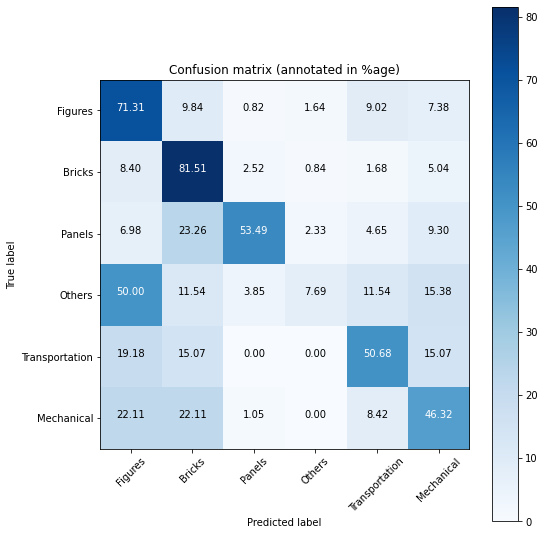

In [ ]:
cf_matrix_tda2=metrics.confusion_matrix(test_results_tda2['actuals'], test_results_tda2['predicted_class'],labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig=plt.figure(figsize=(8,8))

plot_confusion_matrix(cf_matrix_tda2, classes=['Figures', 'Bricks', 'Panels','Others','Transportation','Mechanical'],
                      title='Confusion matrix (annotated in %age)',normalize=True)